In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/focusing-on-mobile-app-or-website/Ecommerce Customers


# About dataset
This dataset is having data of customers who buys clothes online. The store offers in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

#  **Introduction**
This Dataset consist of customer amount spent on online shopping of clothes.The company is trying to decide whether to focus their efforts on their mobile app experience or their website.Firstly we are going to loading and understand the data.
Lets Start



In [2]:
data = pd.read_csv(os.path.join(dirname, filename))
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


> #  **Lets see which kind  off data dealing with**

In [3]:
data.describe(include='all')

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000
unique,500,500,138,NaN,NaN,NaN,NaN,NaN
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",SlateBlue,NaN,NaN,NaN,NaN,NaN
freq,1,1,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33.053194,12.052488,37.060445,3.533462,499.314038
std,NaN,NaN,NaN,0.992563,0.994216,1.010489,0.999278,79.314782
min,NaN,NaN,NaN,29.532429,8.508152,33.913847,0.269901,256.670582
25%,NaN,NaN,NaN,32.341822,11.388153,36.349257,2.930450,445.038277
50%,NaN,NaN,NaN,33.082008,11.983231,37.069367,3.533975,498.887875
75%,NaN,NaN,NaN,33.711985,12.753850,37.716432,4.126502,549.313828


# Review
> As you can see email,address and avatars's have plenty unique values and in this case we don't need this columns.This columns don't give us any idea for realizing the task question. So we are going to drop this columns

In [4]:
data.drop(columns=['Email','Address','Avatar'],axis=1,inplace=True)
data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


# Handling missing values

The dataset looks great. But lets see which amount of missing values we are dealing

In [5]:
data.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

> **Bam! **As I said dataset are great and fortunately we don't have any kind of missing values. In addition, if a missing values is under 5% we can drop missing values.


# Outliers
The next step is handling with outliers.Outliers might be effect our last decision,so its important to clean ouliers.
Lets overview the outliers with boxplot

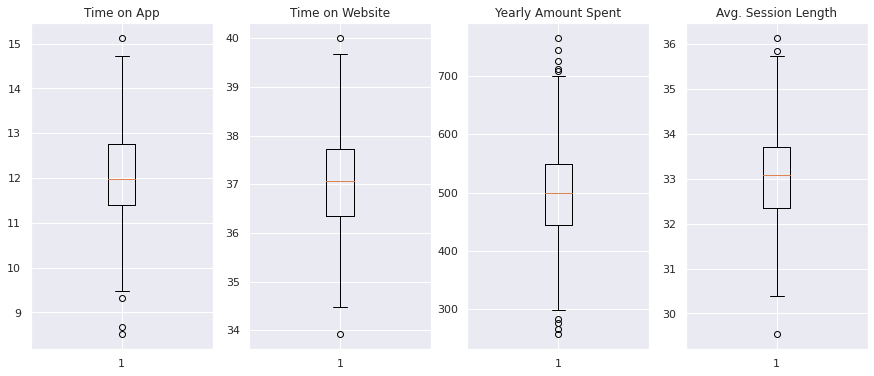

In [6]:
f, (ax1, ax2, ax3,ax4,) = plt.subplots(1, 4,figsize=(15,6))
ax1.boxplot(data['Time on App'])
ax1.set_title('Time on App')
ax2.boxplot(data['Time on Website'])
ax2.set_title('Time on Website')
ax3.boxplot(data['Yearly Amount Spent'])
ax3.set_title('Yearly Amount Spent')
ax4.boxplot(data['Avg. Session Length'])
ax4.set_title('Avg. Session Length')
plt.show()

<AxesSubplot:>

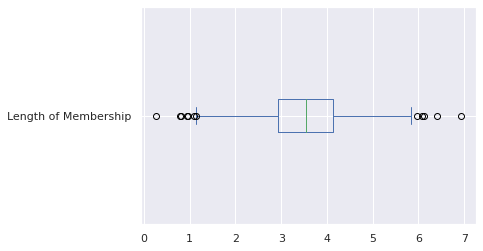

In [7]:
data['Length of Membership'].plot(kind='box',vert=False)

# Outliers review
We can see that all columns have outliers and for clear result I'm going to remove them:)Sometimes we just need to keep some ouliers in the data with 99% of data methods, but this time normal outliers code enough to us


In [8]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


 # Lets see the result of removing ouliers

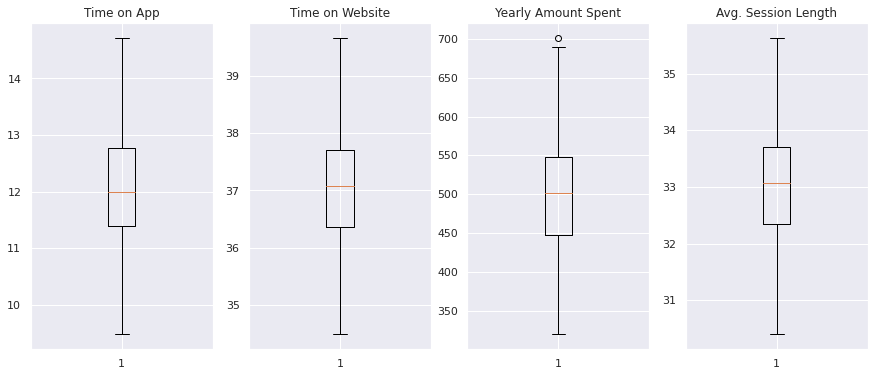

In [9]:
f, (ax1, ax2, ax3,ax4,) = plt.subplots(1, 4,figsize=(15,6))
ax1.boxplot(data['Time on App'])
ax1.set_title('Time on App')
ax2.boxplot(data['Time on Website'])
ax2.set_title('Time on Website')
ax3.boxplot(data['Yearly Amount Spent'])
ax3.set_title('Yearly Amount Spent')
ax4.boxplot(data['Avg. Session Length'])
ax4.set_title('Avg. Session Length')
plt.show()


#  Everything is as we wanted.
In the next step, i need to look our data normal distrubited or not?
Generally, if the mean  and 50 % of data are same or near number it means our data normal distributed.But i want to ensure that.Lets look some visualizations

<AxesSubplot:xlabel='Length of Membership', ylabel='Count'>

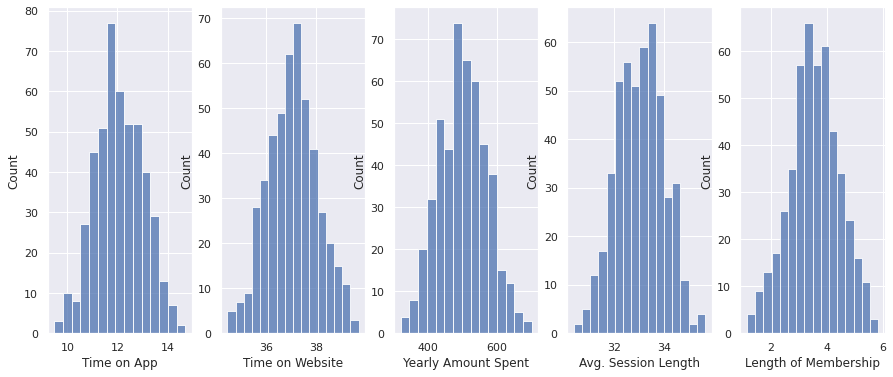

In [10]:
f, ax = plt.subplots(1, 5,figsize=(15,6))
sns.histplot(data['Time on App'],ax=ax[0])
sns.histplot(data['Time on Website'],ax=ax[1])
sns.histplot(data['Yearly Amount Spent'],ax=ax[2])
sns.histplot(data['Avg. Session Length'],ax=ax[3])
sns.histplot(data['Length of Membership'],ax=ax[4])



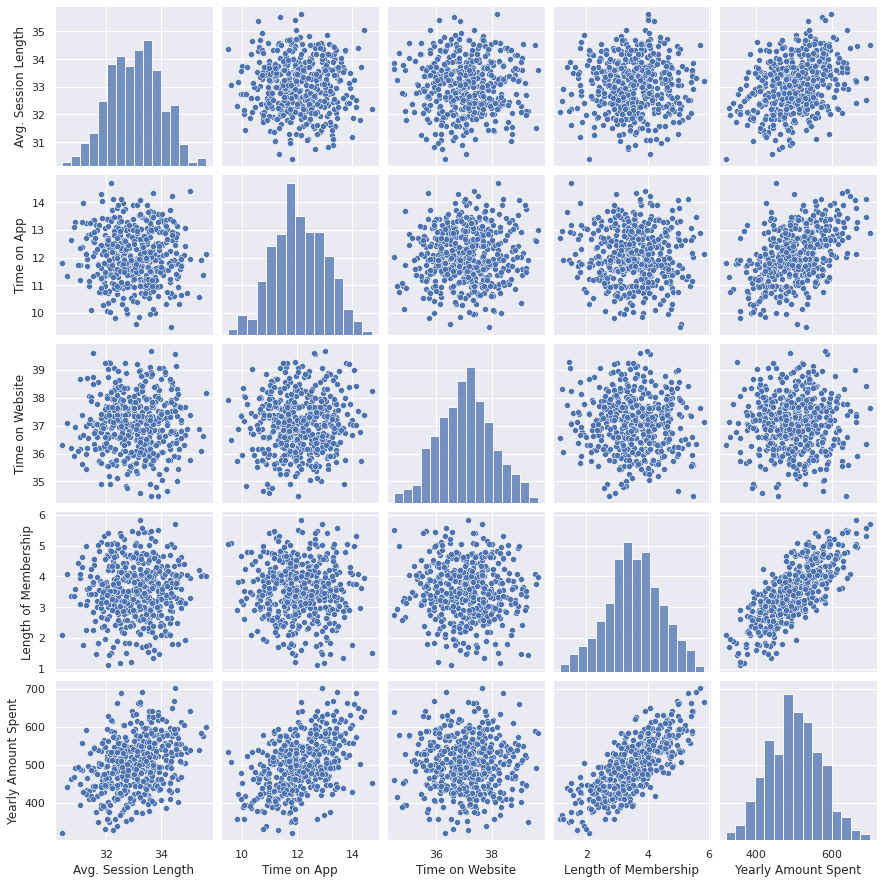

In [11]:
sns.pairplot(data)
plt.show()

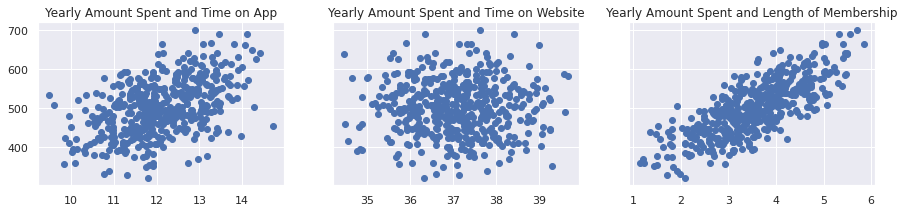

In [12]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data['Time on App'],data['Yearly Amount Spent'])
ax1.set_title('Yearly Amount Spent and Time on App')
ax2.scatter(data['Time on Website'],data['Yearly Amount Spent'])
ax2.set_title('Yearly Amount Spent and Time on Website')
ax3.scatter(data['Length of Membership'],data['Yearly Amount Spent'])
ax3.set_title('Yearly Amount Spent and Length of Membership')

plt.show()

# Last Step :)
Our data normal distributed,we couldn't find out any missing value and clean.Lets figure out that mobile app or website more profitable.Personally, i think we just need to look the correlations to find out that questions

In [13]:
data.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.038177,-0.004834,0.013809,0.339804
Time on App,-0.038177,1.000000,0.065210,-0.054382,0.475560
Time on Website,-0.004834,0.065210,1.000000,-0.046572,0.000581
Length of Membership,0.013809,-0.054382,-0.046572,1.000000,0.767651
Yearly Amount Spent,0.339804,0.475560,0.000581,0.767651,1.000000


<AxesSubplot:>

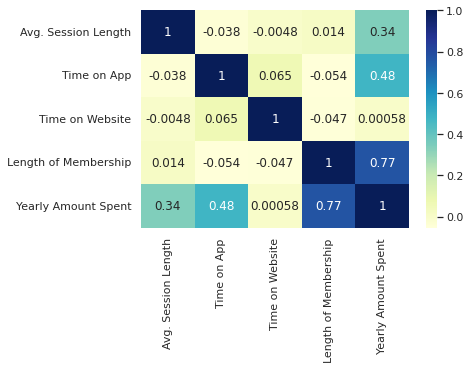

In [14]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


# Conculision

We have tried to find out app or website more profitable.The correlation between Yearly amount spent for Time on website less than 1%(exactly-0.00058). But the correlation between Yearly amount spent and Time on App is 48%(0.48).Obviously,in this case
the company should focus app